In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

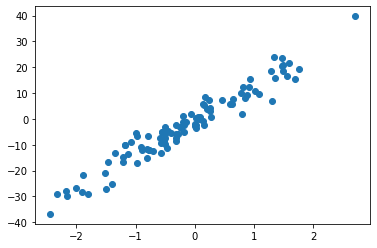

In [2]:
X, Y = datasets.make_regression(n_samples=100, n_features=1, noise=3, random_state=14)
plt.scatter(X, Y)

In [3]:
X = torch.from_numpy(X.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32)).view([-1, 1])
X.shape, Y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [4]:
n_samples, n_features = X.shape

# model

In [5]:
model = nn.Linear(n_features, n_features)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7386]], requires_grad=True),
 Parameter containing:
 tensor([0.6049], requires_grad=True)]

In [10]:
epoch=200
for x in range(epoch):
    # forward
    y_hat = model(X)
    loss = loss_func(y_hat, Y)
    
    #backward
    loss.backward()
    
    #updatee
    optimizer.step()
    optimizer.zero_grad()
    if x%10==0:
        print(f"#epoch{x} - loss={loss.item()} ")

#epoch0 - loss=11.844682693481445 
#epoch10 - loss=11.844682693481445 
#epoch20 - loss=11.844682693481445 
#epoch30 - loss=11.844682693481445 
#epoch40 - loss=11.844682693481445 
#epoch50 - loss=11.844682693481445 
#epoch60 - loss=11.844682693481445 
#epoch70 - loss=11.844682693481445 
#epoch80 - loss=11.844682693481445 
#epoch90 - loss=11.844682693481445 
#epoch100 - loss=11.844682693481445 
#epoch110 - loss=11.844682693481445 
#epoch120 - loss=11.844682693481445 
#epoch130 - loss=11.844682693481445 
#epoch140 - loss=11.844682693481445 
#epoch150 - loss=11.844682693481445 
#epoch160 - loss=11.844682693481445 
#epoch170 - loss=11.844682693481445 
#epoch180 - loss=11.844682693481445 
#epoch190 - loss=11.844682693481445 


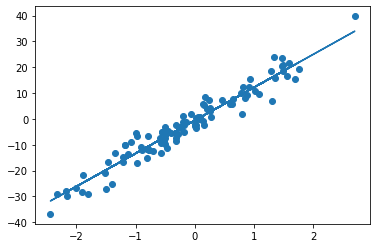

In [8]:
with torch.no_grad():
    y_hat= model(X.clone().detach())

plt.scatter(X, Y)
plt.plot(X,y_hat)